<a href="https://colab.research.google.com/github/ankitbatra22/Gesture-Recognizer/blob/develop/gesture_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ankitbatra22/Gesture-Recognizer.git
%cd Gesture-Recognizer/
!git checkout develop

Cloning into 'Gesture-Recognizer'...
remote: Enumerating objects: 86, done.
remote: Counting objects: 100% (86/86), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 86 (delta 34), reused 57 (delta 16), pack-reused 0
Unpacking objects: 100% (86/86), done.
/content/Gesture-Recognizer
Branch 'develop' set up to track remote branch 'develop' from 'origin'.
Switched to a new branch 'develop'


In [2]:
!pwd
%cd Gesture-Recognizer/

/content
/content/Gesture-Recognizer


In [3]:
import torch
import torch.nn as nn
from preprocessing import VideoFolder
import json
from torchvision.transforms import *
import cv2
from PIL import Image as im
from matplotlib import pyplot as plt
import torch.optim as optim
import os
import tqdm
import numpy as np
from torch.optim.lr_scheduler import ReduceLROnPlateau

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
%%capture
!unzip '/content/drive/MyDrive/20bn-jester-v1-sub.zip'

In [5]:
import json
import os

with open("./configs/config.json") as dataFile:
  config = json.load(dataFile)

save_dir = os.path.join(config["output_dir"], config["model_name"])

transform = Compose([
        CenterCrop(100),
        #Resize(size=(300,300)),
        ToTensor()
        #Normalize(mean=[0.485, 0.456, 0.406],
                  #std=[0.229, 0.224, 0.225])
    ])

In [6]:
train_data = VideoFolder(root=config['train_data_folder'],
                             csv_file_input=config['train_data_csv'],
                             csv_file_labels=config['labels_csv'],
                             clip_size=config['clip_size'],
                             nclips=1,
                             step_size=config['step_size'],
                             is_val=False,
                             transform=transform,
                             )

train_loader = torch.utils.data.DataLoader(
        train_data,
        batch_size=config['batch_size'], shuffle=True,
        num_workers=config['num_workers'], pin_memory=True,
        drop_last=True)
  
val_data = VideoFolder(root=config['val_data_folder'],
                          csv_file_input=config['val_data_csv'],
                          csv_file_labels=config['labels_csv'],
                          clip_size=config['clip_size'],
                          nclips=1,
                          step_size=config['step_size'],
                          is_val=True,
                          transform=transform,
                          )

val_loader = torch.utils.data.DataLoader(
    val_data,
    batch_size=config['batch_size'], shuffle=False,
    num_workers=config['num_workers'], pin_memory=True,
    drop_last=False)

In [7]:
from model import Net

device = (torch.device('cuda') if torch.cuda.is_available()
else torch.device('cpu'))
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())

net = Net()
print(net)
optimizer = torch.optim.Adam(net.parameters(), config['lr'],
                                #momentum=config['momentum'],
                                weight_decay=config['weight_decay'])

criterion = nn.CrossEntropyLoss(reduction='sum')
EPOCHS = 28

Tesla P100-PCIE-16GB
True
Net(
  (conv1): Sequential(
    (0): Conv3d(3, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv3d(64, 128, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(1, 2, 2), stride=(1, 2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv3d(128, 256, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
    (1): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): MaxPool3d(kernel_size=(2, 2, 2), stride=(2, 2, 2), padding=0, dilation=1, ceil_mode=Fals

211
tensor(9)


IndexError: ignored

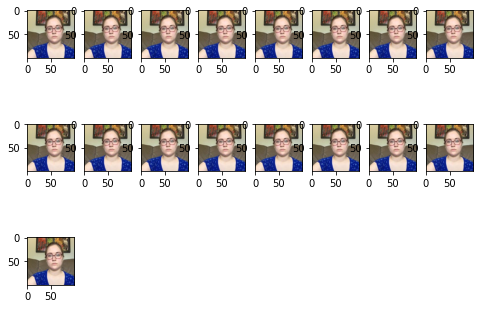

In [8]:
print(len(val_loader))
x = next(iter(val_loader))
#print(x)
#print(x[0].shape)

NUM = 24

print(x[1][NUM])
vidBatch = (x[0][NUM])
pog = vidBatch.permute(1,2,3,0)
pog[0]

import numpy as np
import matplotlib.pyplot as plt

w = 12
h = 12
fig = plt.figure(figsize=(8, 8))
columns = 8
rows = 4

for i in range(1, columns*rows):
    #img = np.random.randint(10, size=(h,w))
    img = pog[i].detach().numpy()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)

plt.show()



  0%|          | 0/1639 [00:00<?, ?it/s]

EPOCH:  0


  0%|          | 0/1639 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  0.8859910013709874 VALIDATION LOSS: 0.5192734619240625
VALIDATION ACCURACY 0.8363447867298578
EPOCH:  1


  0%|          | 0/1639 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  0.4151017463574546 VALIDATION LOSS: 0.4640758694701285
VALIDATION ACCURACY 0.8504146919431279
EPOCH:  2


  0%|          | 0/1639 [00:00<?, ?it/s]


model saved!

TRAIN LOSS:  0.26906606647492254 VALIDATION LOSS: 0.38343131314451095
VALIDATION ACCURACY 0.8829976303317536
EPOCH:  3


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.16973171264979856 VALIDATION LOSS: 0.40392865576026565
VALIDATION ACCURACY 0.8869964454976303
EPOCH:  4


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.10498632584292784 VALIDATION LOSS: 0.43357418728241987
VALIDATION ACCURACY 0.8899585308056872
EPOCH:  5


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.07595956013390205 VALIDATION LOSS: 0.4435680221073259
VALIDATION ACCURACY 0.8975118483412322
EPOCH:  6


  0%|          | 0/1639 [00:00<?, ?it/s]

Epoch     7: reducing learning rate of group 0 to 1.0000e-05.

TRAIN LOSS:  0.05450352117700657 VALIDATION LOSS: 0.48902517865893047
VALIDATION ACCURACY 0.894845971563981
EPOCH:  7


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.014357690341380562 VALIDATION LOSS: 0.4183646238230222
VALIDATION ACCURACY 0.9114336492890995
EPOCH:  8


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.005421106350910786 VALIDATION LOSS: 0.43132644145908405
VALIDATION ACCURACY 0.9117298578199052
EPOCH:  9


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.002920707364958718 VALIDATION LOSS: 0.4579436564139395
VALIDATION ACCURACY 0.9117298578199052
EPOCH:  10


  0%|          | 0/1639 [00:00<?, ?it/s]

Epoch    11: reducing learning rate of group 0 to 1.0000e-06.

TRAIN LOSS:  0.0019298731282020563 VALIDATION LOSS: 0.4778535944234218
VALIDATION ACCURACY 0.9120260663507109
EPOCH:  11


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.001165596267930264 VALIDATION LOSS: 0.483690465085972
VALIDATION ACCURACY 0.9129146919431279
EPOCH:  12


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0011306899876010932 VALIDATION LOSS: 0.48540153662217295
VALIDATION ACCURACY 0.9133590047393365
EPOCH:  13


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0009458888361400232 VALIDATION LOSS: 0.4914596817997986
VALIDATION ACCURACY 0.9135071090047393
EPOCH:  14


  0%|          | 0/1639 [00:00<?, ?it/s]

Epoch    15: reducing learning rate of group 0 to 1.0000e-07.

TRAIN LOSS:  0.0006869564280180658 VALIDATION LOSS: 0.49547925433452944
VALIDATION ACCURACY 0.913803317535545
EPOCH:  15


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0004612453400222498 VALIDATION LOSS: 0.5024678236534554
VALIDATION ACCURACY 0.9143957345971564
EPOCH:  16


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0006930819508697062 VALIDATION LOSS: 0.5017150246617671
VALIDATION ACCURACY 0.9143957345971564
EPOCH:  17


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0004670591750708886 VALIDATION LOSS: 0.49876371704889416
VALIDATION ACCURACY 0.913803317535545
EPOCH:  18


  0%|          | 0/1639 [00:00<?, ?it/s]

Epoch    19: reducing learning rate of group 0 to 1.0000e-08.

TRAIN LOSS:  0.0005576493520300833 VALIDATION LOSS: 0.5011192635783123
VALIDATION ACCURACY 0.9142476303317536
EPOCH:  19


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0010387798628554183 VALIDATION LOSS: 0.5006713030851
VALIDATION ACCURACY 0.9142476303317536
EPOCH:  20


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.00047055774604232815 VALIDATION LOSS: 0.5017900190253243
VALIDATION ACCURACY 0.913803317535545
EPOCH:  21


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0005819729257965764 VALIDATION LOSS: 0.4983384077786468
VALIDATION ACCURACY 0.9143957345971564
EPOCH:  22


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0004439039129692485 VALIDATION LOSS: 0.5023851826156918
VALIDATION ACCURACY 0.9145438388625592
EPOCH:  23


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0004524532596543401 VALIDATION LOSS: 0.5064581639885956
VALIDATION ACCURACY 0.9143957345971564
EPOCH:  24


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.00044000694093620124 VALIDATION LOSS: 0.5022784258091108
VALIDATION ACCURACY 0.9140995260663507
EPOCH:  25


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0006090254969580098 VALIDATION LOSS: 0.5002209168061023
VALIDATION ACCURACY 0.913803317535545
EPOCH:  26


  0%|          | 0/1639 [00:00<?, ?it/s]


TRAIN LOSS:  0.0007087307814301407 VALIDATION LOSS: 0.5006683900945719
VALIDATION ACCURACY 0.9142476303317536
EPOCH:  27


100%|██████████| 1639/1639 [17:32<00:00,  1.56it/s]



TRAIN LOSS:  0.0005588696582303314 VALIDATION LOSS: 0.5018680385635036
VALIDATION ACCURACY 0.9142476303317536


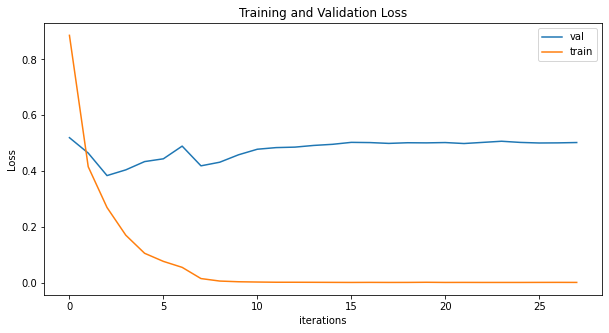

In [9]:
import matplotlib.pyplot as plt
from tqdm import tqdm

net.cuda()
torch.cuda.empty_cache()

val_losses = []
train_losses = []
min_valid_loss = 1e99


scheduler = ReduceLROnPlateau(optimizer, 'min', patience=3, verbose=True)

for epoch in range(EPOCHS):
    correct, total = 0, 0
    train_loss = 0.0
    net.train()

    print("EPOCH: ", epoch)
    for i, (input, target) in enumerate(tqdm(train_loader)):
      #print(i)
      input, target = input.to(device = device), target.to(device = device)
      optimizer.zero_grad()
      output = net(input)
      loss = criterion(output, target)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()

    net.eval()
    validation_loss = 0.0


    with torch.no_grad():
      for i, (item, truth) in enumerate(val_loader):
        item, truth = item.to(device = device), truth.to(device = device)
        out = net(item)
        #print(torch.argmax(out, dim=1), truth)
        # [predictions] and [truth]
        matching = torch.eq(torch.argmax(out, dim=1), truth)
        #print(torch.sum(matching, dim=0).item())
        # [boolean array]
        correct += torch.sum(matching, dim=0).item()
        total += 32
        valLoss = criterion(out, truth)
        validation_loss += valLoss.item()   

    # test accuracy calculation
    assert total == (len(val_loader) * config["batch_size"])
    #print(correct, total)
    accuracy = correct / total
    validation_loss /= (len(val_loader) * config["batch_size"]) #len val loader is the number of val batches
    train_loss /= (len(train_loader) * config["batch_size"])
    
    scheduler.step(validation_loss)

    if validation_loss < min_valid_loss:
      min_valid_loss = validation_loss
      torch.save(net.state_dict(), '/content/drive/MyDrive/july29.pt')
      print()
      print("model saved!")
      
    train_losses.append(train_loss)
    val_losses.append(validation_loss)

    print()
    print("TRAIN LOSS: ", train_loss, "VALIDATION LOSS:", validation_loss, )
    print("VALIDATION ACCURACY", accuracy)



plt.figure(figsize=(10,5))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()



In [10]:
torch.save(net.state_dict(), '/content/drive/MyDrive/latest.pt')